Confusion Matrix:
 [[100067      0]
 [     6  99927]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    100067
           1       1.00      1.00      1.00     99933

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



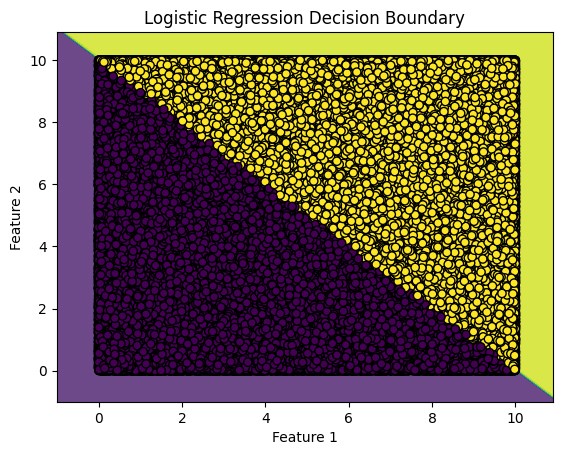

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import os, pickle

NUM_SAMPLE = 10000000

# 1. Generate some example data (binary classification)
np.random.seed(42)
X = np.random.rand(NUM_SAMPLE, 2) * 10  # Two features
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Labels: 1 if sum of features > 10, else 0

# 2. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6. Visualize decision boundary (for two feature case)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()


In [13]:
# Create the directory to save models if it doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

model_save_path = f'saved_models/logistic_regression_model_{NUM_SAMPLE}.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved at: {model_save_path}")

Model saved at: saved_models/logistic_regression_model_1000000.pkl
